- 5회차 학습 목표
 - 불균형 범주에 대한 샘플링 적용
 - 4회차 분류 기법 리뷰 및 응용
 - 앙상블 기법 및 Parameter Search

In [ ]:
# mortDefault.csv를 읽으신 후에, default....변수가 target으로 하셔서, 
#분류모형을 적용해보세요

# DT, RF, KNN 3개로 적용하세요

# 필요하신 전처리 적용,,,Gridsearch 필요하시면 적용하세요...

#파티셔닝 8:2,,,,

#8시20분까지해보세요~


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

mort = pd.read_csv("mortDefault.csv")
mort.drop( "year", axis=1, inplace=True)
mort.head()
mort.info()

In [ ]:
import numpy as np
mort.creditScore.replace("@@@", np.NaN, inplace=True)
mort.creditScore.replace("qqq", np.NaN, inplace=True)

mort.dropna(inplace=True)
mort.info()

In [ ]:
X=mort.drop("default", axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   creditScore  999995 non-null  object 
 1   houseAge     999995 non-null  float64
 2   yearsEmploy  999995 non-null  float64
 3   ccDebt       999995 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 38.1+ MB


In [ ]:
X_scaled = MinMaxScaler().fit_transform( X )
y = mort.default

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)


In [ ]:
mort.default.value_counts()

0    975254
1     24741
Name: default, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 0.2 , k_neighbors = 5, random_state=1)   
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
X_train.shape

(799996, 4)

In [ ]:
X_train_res.shape

(936294, 4)

In [ ]:
dt_params = {"max_depth":[2,3,4]}
rf_params = {"n_estimators": [100]}
knn_params = {"n_neighbors":[3,5,7]}

grid_dt = GridSearchCV( DecisionTreeClassifier(), dt_params ).fit( X_train, y_train)
grid_dt.best_estimator_


grid_rf = GridSearchCV( RandomForestClassifier(), rf_params )
grid_rf.fit( X_train, y_train)
grid_rf.best_estimator_

grid_knn = GridSearchCV( KNeighborsClassifier(), knn_params )
grid_knn.fit( X_train, y_train)
grid_knn.best_estimator_


DecisionTreeClassifier(max_depth=4)

#1. Up sampling, Down Sampling
 - down sampling: 데이터 수를 줄이기
 - up sampling: 늘리기

- Over-sampling : SMOTE

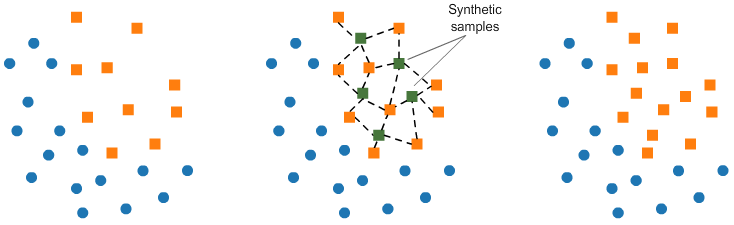

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   
import seaborn as sns

#파티셔닝 수행
from sklearn.model_selection import train_test_split
import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

pima_df = pd.read_csv("diabetes.csv")
pima_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:

pima_df[~pima_df.applymap(np.isreal).all(1)]
pima_df = pima_df.fillna(pima_df.median())
pima_df

pima_df.describe().transpose()
pima_df.groupby(["Outcome"]).count()
sns.pairplot(pima_df , hue='Outcome' , diag_kind = 'kde')

 - Up sampling

In [ ]:
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

#SMOTE for upsampling smaller cases
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   
#Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))
print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


Before UpSampling, counts of label '1': 184
Before UpSampling, counts of label '0': 353 

After UpSampling, counts of label '1': 353
After UpSampling, counts of label '0': 353 

After UpSampling, the shape of train_X: (706, 7)
After UpSampling, the shape of train_y: (706,) 



In [ ]:
# Fit the model on original data i.e. before upsampling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

# fit model on upsampled data 

model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))


0.7619047619047619
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83       147
         1.0       0.74      0.54      0.62        84

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231

[[131  16]
 [ 39  45]]
0.7575757575757576
[[110  37]
 [ 19  65]]
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80       147
         1.0       0.64      0.77      0.70        84

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.77      0.76      0.76       231



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

 - Down Sampling

In [ ]:
#Down Sampling the larger class
non_diab_indices = pima_df[pima_df['Outcome'] == 0].index   # Get the record numbers of non-diab cases
no_diab = len(pima_df[pima_df['Outcome'] == 0])             # how many non-diab cases
print(no_diab)

diab_indices = pima_df[pima_df['Outcome'] == 1].index       # record number of the diabeteics cases
diab = len(pima_df[pima_df['Outcome'] == 1])                # how many diabetic cases
print(diab)

random_indices = np.random.choice( non_diab_indices, no_diab - 200 , replace=False)    #Randomly pick up 200 non-diab indices

down_sample_indices = np.concatenate([diab_indices,random_indices])  # combine the 200 non-diab indices with diab indices

pima_df_down_sample = pima_df.loc[down_sample_indices]  # Extract all those records for diab and non-diab to create new set
pima_df_down_sample.shape
pima_df_down_sample.groupby(["Outcome"]).count()  # look at the class distribution after downsample

array = pima_df_down_sample.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

print('After DownSampling, the shape of X_train: {}'.format(X_train.shape))
print('After DownSampling, the shape of X_test: {} \n'.format(X_test.shape))

# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))


500
268
After DownSampling, the shape of X_train: (397, 7)
After DownSampling, the shape of X_test: (171, 7) 

0.7719298245614035
[[75 23]
 [16 57]]
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79        98
         1.0       0.71      0.78      0.75        73

    accuracy                           0.77       171
   macro avg       0.77      0.77      0.77       171
weighted avg       0.78      0.77      0.77       171



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#IMBLearn Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(replacement=False)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
y_rus
y_rus.shape

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
y_ros
y_ros.shape
X_ros.shape


(404, 7)

In [ ]:
# titanic_data_clean.csv를 읽으셔서 분류 모형을.....
# Target: survived ....
# 파티셔닝: 8:2
# 분류모형 RF, KNN
# survived 범주의 분포를 보시고, ->over_samlig
# gridsearchcv 적용해보세요..
# 30분까지 해보세요

# 2. 분류모형 리뷰


- 의사결정 나무
  - 불순도 (impurity)가 작은 방향, information gain이 큰 방향으로 분기 (e.g., entropy, gini index, ...)
  
- 장점
  - 간단하고 효과적
  - interpretable/직관적 rule
  - 통계적 가정 불필요
- 단점
  - 비연속성: 분리의 경계점 근방에서는 예측 오류가 클 가능성이 있음
  - 선형성 결여: 전체적인 선형 관계 파악이 어려움
  - 비안정성: 데이터 수가 적을 경우 불안정; 과적합에 취약하므로 가지치기 필요

- DT의 예: ID3 VS CART
  - gini index를 기준으로 불순도 평가
  - binary tree 사용
  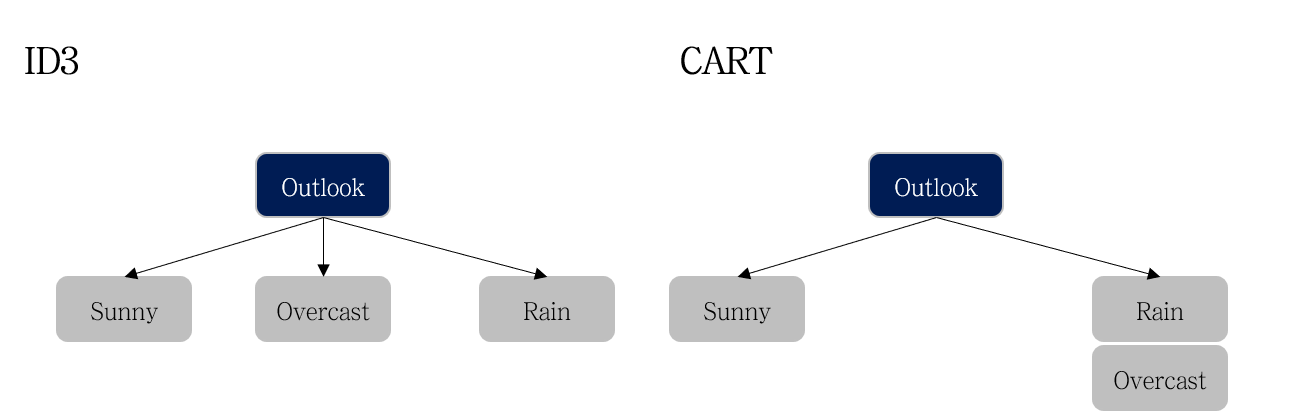

## titanic 데이터로 실습

## Step 1. Preprocessing

In [ ]:
# csv파일 불러오기
import pandas as pd
titanic_data = pd.read_csv("titanic_data_clean.csv")

In [ ]:
titanic_data # 0: DEAD, 1: Survive
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Fare      891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [ ]:
titanic_data.info()
# (0: dead, 1: survived)
titanic_data.isnull().sum() #결측치확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Fare      891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Pclass      0
Sex         0
Fare        0
Survived    0
dtype: int64

In [ ]:
import pandas as pd
titanic_data['Survived'].value_counts() # Y열의 데이터 개수 확인

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# 문자로 된 열을 더미변수로 변경해주기 (여자=0, 남자=1)
# from sklearn.preprocessing import LabelEncoder
titanic_data["Sex"] = titanic_data.Sex.map({"female":0, "male":1})

In [ ]:
titanic_data.Pclass.unique()

array([3, 1, 2])

In [ ]:
# Features와 target 나누기
t_features = titanic_data[titanic_data.columns[:-1]]
t_target = titanic_data[titanic_data.columns[-1]]

In [ ]:
# One-hot Encoding
t_features = pd.get_dummies(data = t_features, columns = ['Pclass'], prefix = 'Pclass')

In [ ]:
t_features

,Sex,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,7.2500,0,0,1
1,0,71.2833,1,0,0
2,0,7.9250,0,0,1
3,0,53.1000,1,0,0
4,1,8.0500,0,0,1
...,...,...,...,...,...
886,1,13.0000,0,1,0
887,0,30.0000,1,0,0
888,0,23.4500,0,0,1
889,1,30.0000,1,0,0


In [ ]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    t_features, t_target, test_size = 0.2, random_state = 2021, stratify=t_target)

In [ ]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

712
712
179
179


In [ ]:
import pandas as pd
pd.DataFrame(train_target)['Survived'].value_counts() # Y열의 데이터 개수 확인

0    439
1    273
Name: Survived, dtype: int64

- class 불균형이 심한 경우 샘플링 진행

In [ ]:
# Under Sampling: Y값을 각각 {0, 1} 239명씩
## sampling하기 전에 shuffling을 해주기(행 순서 섞기)
import sklearn
x_shuffled = sklearn.utils.shuffle(train_features, random_state=312)
y_shuffled = sklearn.utils.shuffle(train_target, random_state=312)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
train_features_us, train_target_us = RandomUnderSampler(random_state=312).fit_resample(x_shuffled, y_shuffled)

from imblearn.over_sampling import SMOTE
sm = SMOTE( sampling_strategy=1, k_neighbors=5)
train_features_os, train_target_os = sm.fit_resample(x_shuffled, y_shuffled)

In [ ]:
import pandas as pd
pd.DataFrame(train_target_os)['Survived'].value_counts() # Y열의 데이터 개수 확인: total 546명

0    439
1    439
Name: Survived, dtype: int64

In [ ]:
dt_params = {"max_depth":[2,3,4]}
rf_params = {"n_estimators": [100]}
knn_params = {"n_neighbors":[3,5,7]}

grid_dt = GridSearchCV( DecisionTreeClassifier(), dt_params ).fit( train_features_os,train_target_os)
grid_dt.best_estimator_

grid_rf = GridSearchCV( RandomForestClassifier(), rf_params )
grid_rf.fit( X_train, y_train)
grid_rf.best_estimator_

grid_knn = GridSearchCV( KNeighborsClassifier(), knn_params )
grid_knn.fit( X_train, y_train)
grid_knn.best_estimator_
grid_knn.best_score_


0.7225510557286258

In [ ]:
grid_knn.cv_results_

## Step 2. Decision Tree Modeling
- gini: 엔트로피와 같은 불순도 (Impurity) 지표
  - 분류가 잘 될 때 낮은 값
  - CART 알고리즘에서는 모든 조합에 대해 Gini index를 계산한 후, Gini index가 가장 낮은 지표를 찾아 분기
- entropy (uncertainty)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 312)
# criterion = 'gini' 또는 'entropy' (default='gini')
# max_depth = None (default)
# min_samples_leaf = 1 (default)
# min_samples_split = None (default)
# random_state = None (default)

tree_fit = tree.fit(train_features_us, train_target_us)

In [ ]:
tree_fit

DecisionTreeClassifier(random_state=312)

In [ ]:
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import os

In [ ]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Dead', 'Survive'])

In [ ]:
dot_data = export_graphviz(tree,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') #Tree 이미지를 저장

True

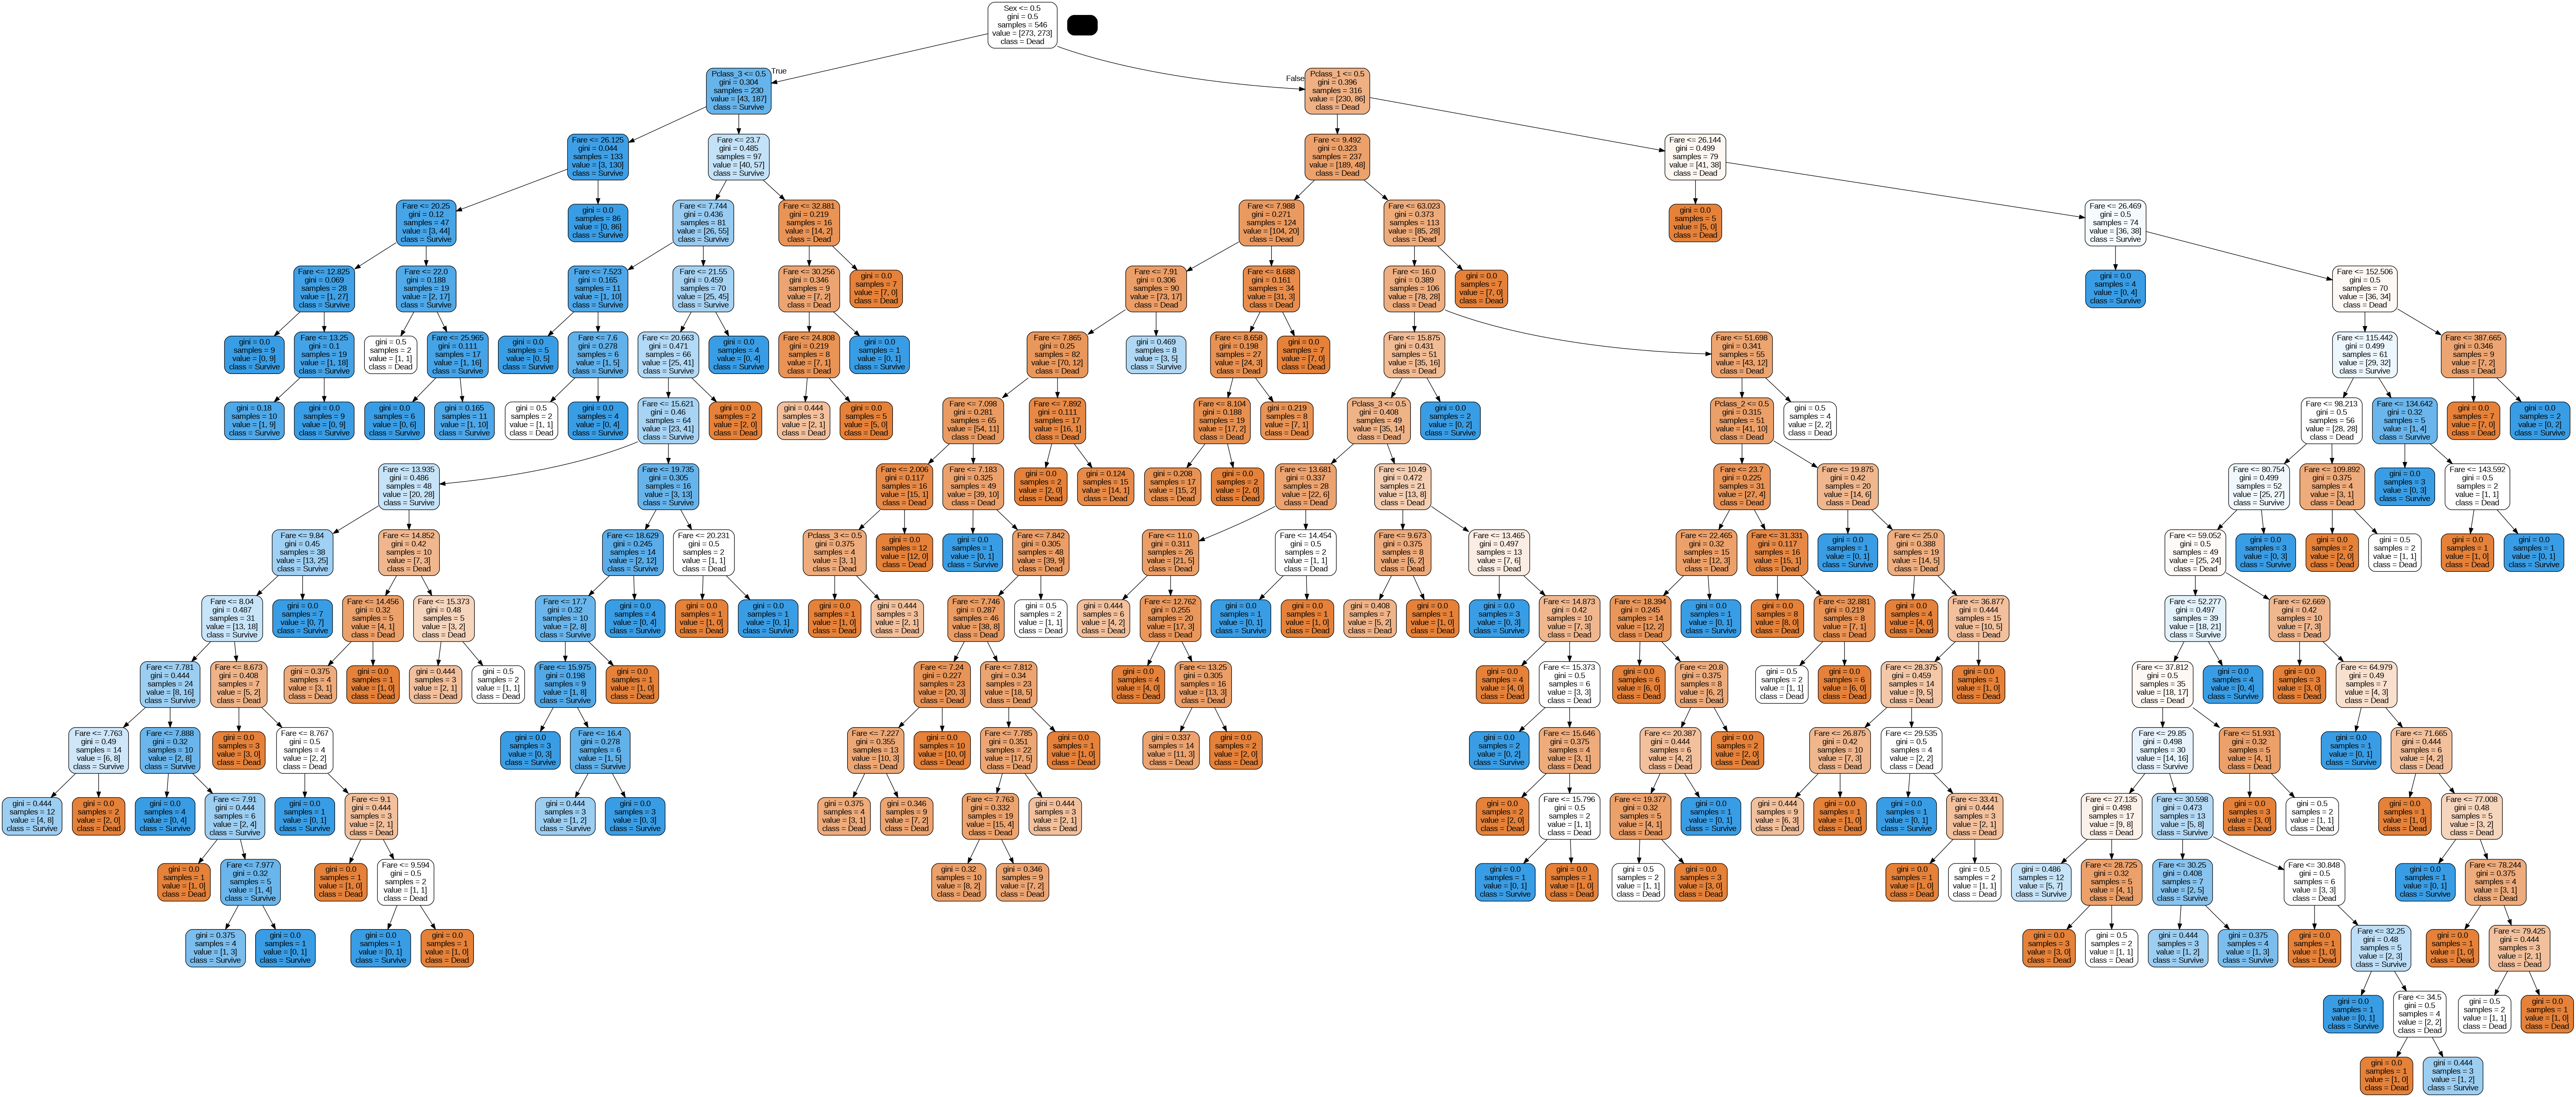

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = tree,
                       X=train_features_us,
                       y=train_target_us,
                       scoring = ['accuracy'],
                       cv=10,
                       n_jobs= -1,
                       return_train_score=False)

print('CV accuracy: %s' % scores['test_accuracy'])
print('CV aacuracy(Mean): %.3f (std: %.3f)' % (np.mean(scores['test_accuracy']),
                                     np.std(scores['test_accuracy'])))

CV accuracy: [0.67272727 0.81818182 0.8        0.8        0.76363636 0.89090909
 0.7037037  0.77777778 0.81481481 0.75925926]
CV aacuracy(Mean): 0.780 (std: 0.058)


In [ ]:
y_pred = tree.predict(test_features)

In [ ]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])

confmat

,Predict[0],Predict[1]
True[0],91,19
True[1],18,51


In [ ]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.73      0.74      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

정확도 accuracy: 0.793
정밀도 precision: 0.729
재현율 recall: 0.739
F1-score: 0.734
AUC: 0.783


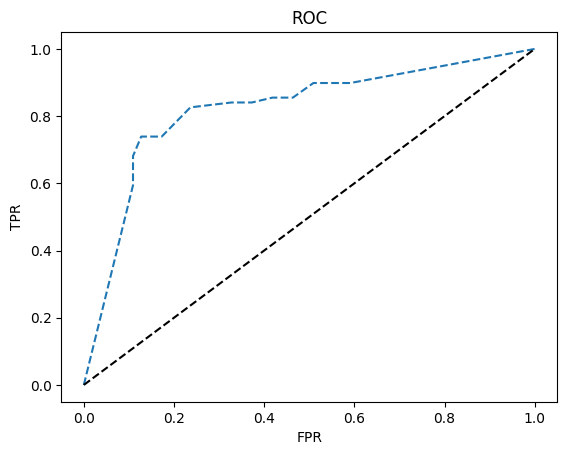

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

## Step 3. Optimization

In [ ]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=312)) # default model로 시작
# pipeline은 hyper-parameter 값을 바꾸면서 여러 모델을 사용 가능.

In [ ]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

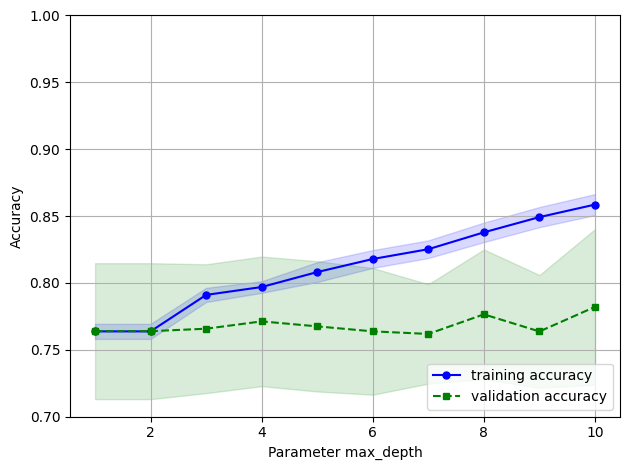

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features_us,
                                                   y = train_target_us,
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   scoring="accuracy",
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()

# train accuracy와 validation accuracy가 모두 적절한 성능 & 오버피팅이 발생하기 전까지인 max_dept = 4 선택

## Step 4. Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['gini', 'entropy']

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리; -1은 전부를 의미

gs = gs.fit(train_features_us, train_target_us)

print(gs.best_score_)
print(gs.best_params_)

0.774949494949495
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 10}


In [ ]:
# 최적의 모델 선택
best_tree = gs.best_estimator_
best_tree.fit(train_features_us, train_target_us)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=10,
                                        random_state=312))])

In [ ]:
best_tree_for_graph = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, random_state = 2021)

In [ ]:
best_tree_for_graph.fit(train_features_us, train_target_us)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=2021)

In [ ]:
y_pred = best_tree.predict(test_features)

In [ ]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],96,14
True[1],23,46


In [ ]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

정확도 accuracy: 0.793
정밀도 precision: 0.767
재현율 recall: 0.667
F1-score: 0.713
AUC: 0.770


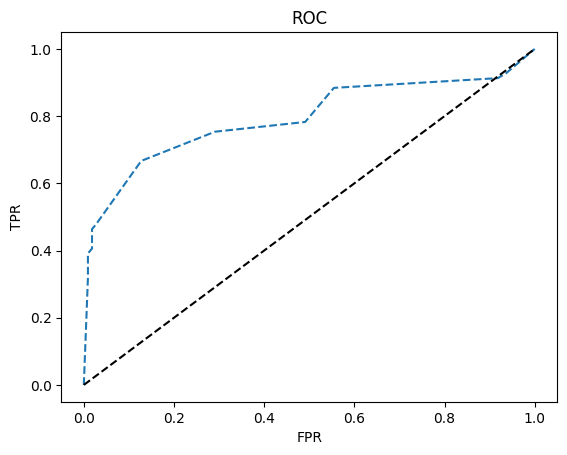

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, best_tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [ ]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Dead', 'Survive'])

In [ ]:
dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph.write_png('tree_best.png') #Tree 이미지를 저장

True

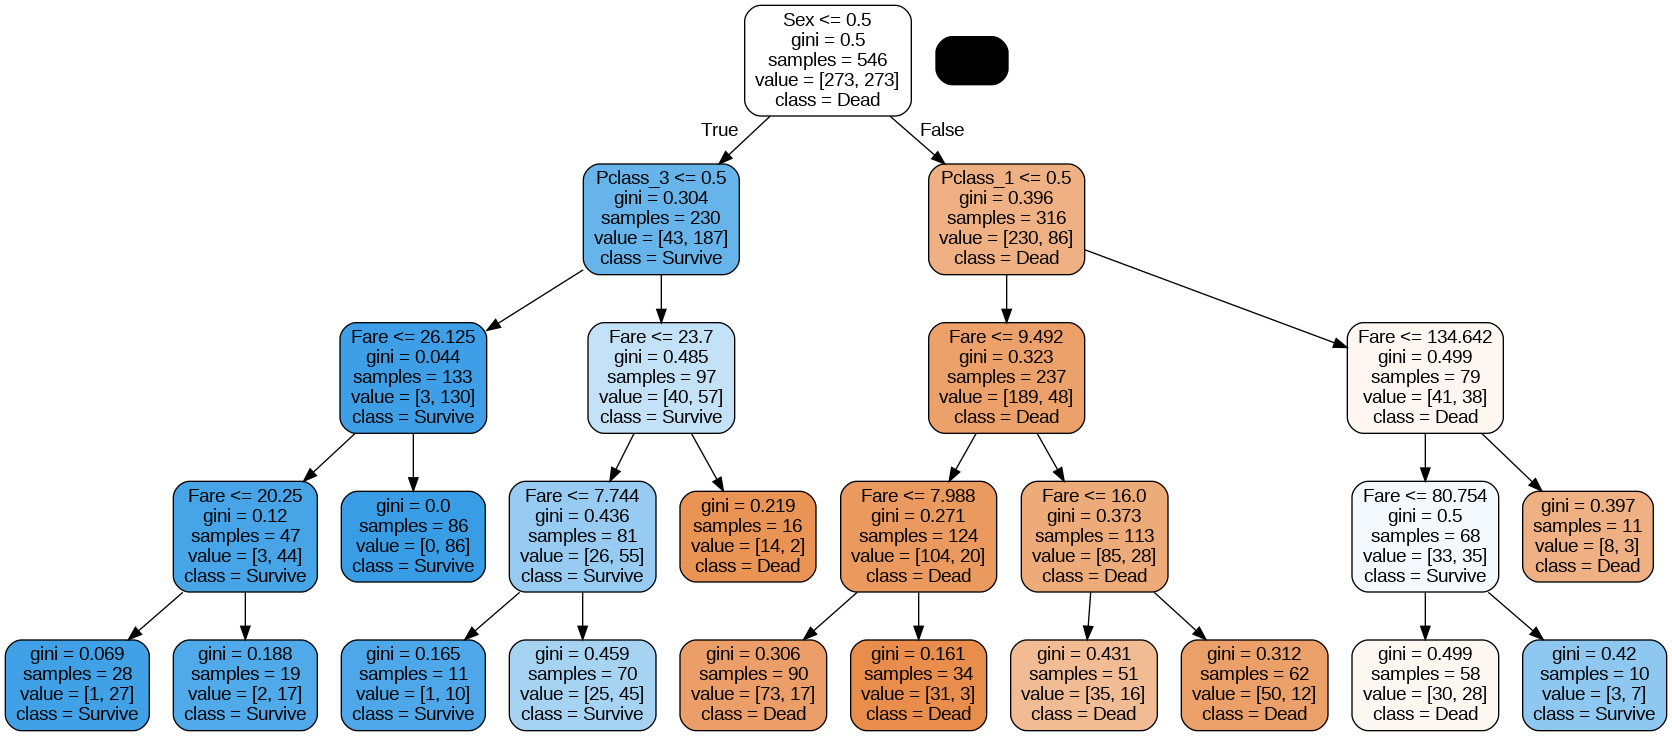

In [ ]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

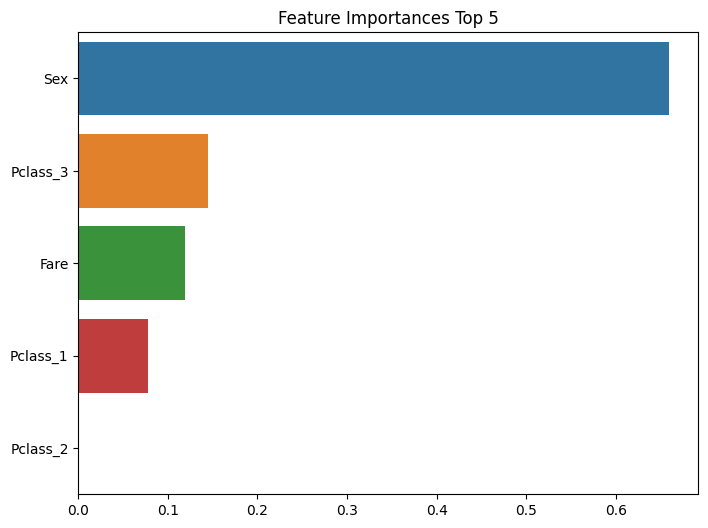

In [ ]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=train_features_us.columns)
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [ ]:
feature_importances.sort_values(ascending=False)

Sex         0.659298
Pclass_3    0.144295
Fare        0.118618
Pclass_1    0.077789
Pclass_2    0.000000
dtype: float64

# 3. Gradient Boosting, XGBoost, LightGBM, CatBoost 비교

###Gradient boosting 
- 강력한 앙상블 기법
- DT를 Boost하여 오차 Gradient를 최소화
- Tree모형을 기반으로 하는 앙상블
- 미분 가능한 loss 함수와 GD 최적화 알고리즘을 사용(=ANN)
- GBM의 하이퍼파라미터
 - The number of trees or estimators in the model.
 - The learning rate of the model.
 - The row and column sampling rate for stochastic models.
 - The maximum tree depth.
 - The minimum tree weight.
 - The regularization terms alpha and lambda.

 - loss : 경사 하강법에서 사용할 비용 함수. 기본값 'devidence'
 
 - learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. 기본값은  0.1
  - weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수
  - 0 ~ 1 사이의 값
  - 작을 경우, 예측 성능이 높아질 수 있으나 많은 week learner가 순차적인 반복이 필요해 수행시간이 길어지고 local optima에 빠질 수 있음
  - 너무 큰 값을 설정하는 경우, 최적값을 못찰을 수 있어 성능이 떨어질 가능성이 있으나, 시간은 단축
  - learning_rate은 n_estimator와 상호 보완적으로 활용

 - n_estimators: weak learner의 개수이며,기본값은 100
  - weak learner가 많으면 성능 개선이 있지만 많은 시간 소요

- subsample: weak learner가 학습에 사용하는 데이터 샘플링의 비율, 기본값은 1이며, 전체 데이터를 기반으로 학습함. 1보다 작은 값을 설정해서 과적합을 완화시킬 수 있음

#### Classification Dataset
- make_classification() function 이용하여 Binary 분류 데이터셋 생성
- 1,000 행 10 열


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier()
boost.fit( X_train, y_train )


In [ ]:
boost.estimator_weights_
boost.feature_importances_
np.mean( y_test == boost.predict(X_test) )

In [ ]:
# binary.csv 파일을 읽으셔서, RF, Adaboost로 각각 분류모형을 만들어보세요.
#파티셔닝 8:2
binary = pd.read_csv("binary.csv")
y = binary.admit
X = binary.drop("admit", axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify = y)
boost = AdaBoostClassifier().fit( X_train, y_train)
rf = RandomForestClassifier().fit( X_train, y_train)

print( boost.score( X_test, y_test) )
rf.score( X_test, y_test)

0.6375


0.5625

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)


(1000, 10) (1000,)


#### Regression Dataset
- make_regression() function 회귀용 데이터셋 생성(1000X10).

In [ ]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


### 1. Gradient Boosting
-sklearn의 ensemble의 GradientBoostingClassifier 와 GradientBoostingRegressor 





In [ ]:
#k-fold
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
print("k-fold")
for train, test in kf.split(X):
    print("%s %s" % (train, test))


#repeated k-fold: k-fold를 여러번 반복, 반복된 수행마다 각각 다른 분할 생성
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 123
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)

print("repeated k-fold")
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

#LOO: leave one out, 적은 샘플에서 사용, 한 샘플만 빼놓고 학습
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()

print("LOO")
for train, test in loo.split(X):
    print("%s %s" % (train, test))

#Leave p out
from sklearn.model_selection import LeavePOut
X = np.ones(4)
lpo = LeavePOut(p=2)

print("LPO")
for train, test in lpo.split(X):
    print("%s %s" % (train, test))

# Shuffle & Split: 샘플을 셔플(섞기)한 후, train/test 나누기
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

print("Shuffle & Split")
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

#Stratified K-Fold: 기존 K-Fold의 변형된 방식, 각 fold에는  전체 데이터의 타겟이 범주의 표본 비율을 반영, 불균형한 경우 적용
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)

print("stratified k-fold")
for train, test in skf.split(X, y):
    print('train -  {}   VS   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))

 

k-fold
[2 3] [0 1]
[0 1] [2 3]
repeated k-fold
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[1 3] [0 2]
LOO
[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]
LPO
[2 3] [0 1]
[1 3] [0 2]
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[0 1] [2 3]
Shuffle & Split
[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]
stratified k-fold
train -  [30  3]   VS   test -  [15  2]
train -  [30  3]   VS   test -  [15  2]
train -  [30  4]   VS   test -  [15  1]


In [ ]:
# gradient boosting for classification 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

#  dataset 생성
X, y = make_classification(n_samples=2000, n_features=15, n_informative=5, n_redundant=5, random_state=1)

X.shape
y

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
# CV 결과
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.915 (0.025)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )

In [ ]:
#피팅
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
model = GradientBoostingClassifier(learning_rate=0.05, 
                                   n_estimators=200).fit(X_train, y_train)
model2 = AdaBoostClassifier(learning_rate=0.05, 
                                   n_estimators=200).fit( X_train, y_train)
model3 = RandomForestClassifier().fit( X_train, y_train)
model4 = XGBClassifier().fit( X_train, y_train)
model5 = LGBMClassifier().fit( X_train, y_train)

In [ ]:
print(model.score(X_test, y_test))
print(model2.score(X_test, y_test))
print(model3.score(X_test, y_test))
print(model4.score(X_test, y_test))
print(model5.score(X_test, y_test))

In [ ]:
#XGBoost에서 learning_rate=0.05, 0.1, 0.15 바꿔보시고, n_estimators를 50, 100, 150
#GridSearchCV 해보시고 최적의 모형을 찾아서 test에 적용해보세요.
xparam = {"learning_rate":[0.05, 0.1, 0.15], "n_estimators":[50,100,150]}
xgb_cv = GridSearchCV( XGBClassifier(), xparam ).fit( X_train, y_train)

In [ ]:
best = xgb_cv.best_estimator_ #cv결과 중 제일 좋은 모형
best.score(X_test, y_test)

0.8725

1. sms.csv를 읽으셔서 type을 target으로 하는 분류 모형을 만들어보세요
- 파티션 8:2 / 모형: XGBoost, RandomForest, NB
- 상대적으로 좋은 성능의 모형을 gridsearch해보세요
- 테스트셋 예측->classification_report출력

2. creditset2.csv에 대해서 lightGBM으로 분류모형을 만들어보세요
- 8:2 파티셔닝 / GridSearchCV로 파라미터 탐색
- 테스트셋 예측값->classification_report

3. train.csv를 읽으셔서 label을 target으로 하는 분류 모형을 만들어보세요
- 모형: XGBoost, RandomForest, DT, KNN
- XGBoost, RandomForest 모형들을 gridsearch해보세요
- test.csv를 읽은 테스트셋에 대해서 예측->classification_report출력으로 두 모형을 비교해보세요


In [ ]:
#1. sms.csv
sms = pd.read_csv("sms.csv")
sms.dropna(inplace=True)
X = sms.drop("type", axis=1)
y = sms.type
X_train,X_test,y_train, y_test = train_test_split( X,y, 
                                                  test_size=0.2, stratify = y)

In [ ]:
from sklearn.naive_bayes import GaussianNB  

model1 = XGBClassifier().fit(X_train, y_train)
model2 = RandomForestClassifier().fit(X_train, y_train)
model3 = GaussianNB().fit(X_train, y_train)

In [ ]:
print(model1.score(X_train,y_train))
print(model2.score(X_train,y_train))
print(model3.score(X_train,y_train))

0.9475218658892128
0.9777977124915901
0.38057860506840097


In [ ]:
cv1 = GridSearchCV( RandomForestClassifier(), {"n_estimators":[250,300,350],
                                               "max_depth":[2,3,4]}).fit(X_train, y_train)
best1 = cv1.best_estimator_

In [ ]:
from sklearn.metrics import classification_report
print( classification_report(y_test, best1.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       966
           1       1.00      0.11      0.19       149

    accuracy                           0.88      1115
   macro avg       0.94      0.55      0.56      1115
weighted avg       0.90      0.88      0.84      1115



In [ ]:
#2. credistset2.csv
credit = pd.read_csv("creditset2.csv")
credit.dropna(inplace=True)
X = credit.drop("default10yr", axis=1)
y = credit.default10yr
X_train,X_test,y_train, y_test = train_test_split( X,y, test_size=0.2, stratify = y)

cv2 = GridSearchCV(LGBMClassifier(), {"n_estimators":[100,150,200], "learning_rate":[0.05,0.1, 0.15]}).fit(X_train, y_train)
best2 = cv2.best_estimator_
print( classification_report(y_test, best2.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       343
           1       0.98      0.96      0.97        57

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.99      0.99       400



In [ ]:
#3. train.csv
train = pd.read_csv("train.csv")
train.dropna(inplace=True)
X_train = train.drop("label", axis=1)
y_train = train.label

test = pd.read_csv("test.csv")
X_test = test.drop("label", axis=1)
y_test = test.label

model4 = DecisionTreeClassifier().fit(X_train, y_train)
print(model4.score(X_test,y_test))

X_train_scaled = X_train.values/255.0 #MinMaxScaling  
model5 = KNeighborsClassifier().fit(X_train_scaled, y_train)
print(model5.score(X_test/255.0, y_test))

0.788


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.945


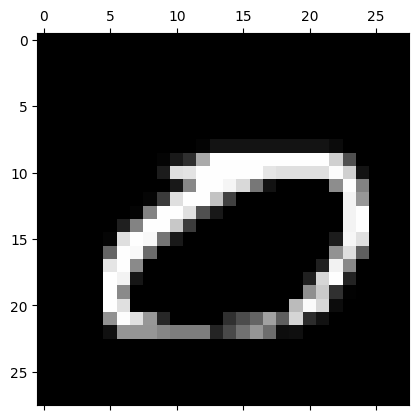

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(X_train_res[0], cmap=plt.cm.gray)
plt.show()

In [ ]:
cv3 = GridSearchCV(XGBClassifier(), {"n_estimators":[100], "learning_rate":[0.1]}, 
                   verbose=4, cv=2).fit(X_train, y_train)
best3 = cv3.best_estimator_
print( classification_report(y_test, best3.predict(X_test)) )

cv4 = GridSearchCV(RandomForestClassifier(), {"n_estimators":[200], "max_depth":[3]}, 
                   verbose=4,cv=2).fit(X_train, y_train)
best4 = cv4.best_estimator_
print( classification_report(y_test, best4.predict(X_test)) )

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END learning_rate=0.1, n_estimators=100;, score=0.911 total time= 2.1min
[CV 2/2] END learning_rate=0.1, n_estimators=100;, score=0.909 total time= 2.0min
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       100
           1       0.96      0.98      0.97       100
           2       0.91      0.96      0.94       100
           3       0.95      0.91      0.93       100
           4       0.96      0.93      0.94       100
           5       0.94      0.94      0.94       100
           6       0.95      0.95      0.95       100
           7       0.95      0.95      0.95       100
           8       0.95      0.93      0.94       100
           9       0.90      0.94      0.92       100

    accuracy                           0.94      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.95      0.94      0.95      1000

Fitting 2 folds fo

In [ ]:
# 10개값을 갖는 한 개의 X 샘플에 대한 범주 예측
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Prediction: 1


In [ ]:
# 행이 2000개, 변수는 15개인 X, 2000개의 값을 갖는 y를 만드세요
# train, test를 나누셔서(8:2)
# AdaBoost, GBM으로 각각 분류모델링, ->테스트셋 성능 비교해보세요


-회귀

In [ ]:
# gradient boosting for regression 
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# 데이터셋 생성
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# CV 평가(MAE)
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
#CV에서는 스코어가 높은 알고리즘을 좋은 것으로 판단, MAE의 경우는 반대이기 때문에 -를 붙여줌

print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# 피팅
model = GradientBoostingRegressor()
model.fit(X, y)

# 10개의 값을 갖는 한 개의 샘플x에 대한 예측
row = [[2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = model.predict(row)
print('Prediction: %.3f' % yhat)


MAE: -11.859 (1.125)
Prediction: -80.661


### 2. Histogram-Based Gradient Boosting
- LightGBM library와 유사한 GB 모형
- HistGradientBoostingClassifier와 HistGradientBoostingRegressor
- 속도가 개선된 GB모형.


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting

#분류
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = HistGradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = HistGradientBoostingClassifier()
model.fit(X, y)

# prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Accuracy: 0.934 (0.027)
Prediction: 1


In [ ]:
#회귀
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# evaluate the model
model = HistGradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = HistGradientBoostingRegressor()
model.fit(X, y)

# prediction
row = [[2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = model.predict(row)
print('Prediction: %.3f' % yhat)

MAE: -12.723 (1.540)
Prediction: -77.837


### 3.Gradient Boosting With XGBoost
- Extreme Gradient Boosting을 의미하며, sklearn 대신 xgboost 라이브러리 이용
- 계산 효율성을 높이며, 성능도 개선
- colab에 설치되어 있으며 필요 시 !pip install xgboost
- XGBClassifier와 XGBregressor 제공


In [ ]:
# 분류, xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = XGBClassifier()
model.fit(X, y)

# prediction
row = [2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]
row = asarray(row).reshape((1, len(row)))
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Accuracy: 0.936 (0.019)
Prediction: 1


In [ ]:
# xgboost for regression
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# evaluate the model
model = XGBRegressor(objective='reg:squarederror')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = XGBRegressor(objective='reg:squarederror')
model.fit(X, y)

# prediction
row = [2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]
row = asarray(row).reshape((1, len(row)))
yhat = model.predict(row)
print('Prediction: %.3f' % yhat)

MAE: -15.048 (1.316)
Prediction: -93.434


### 4.Gradient Boosting With LightGBM
- Light Gradient Boosted Machine
- MS에 의해 개발, 효율성이 강조된 GBM
- 설치되어 있으며 필요 시 !pip install lightgbm
- LGBMClassifier , LGBMRegressor classes.


In [ ]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = LGBMClassifier()
model.fit(X, y)

# prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)



Accuracy: 0.934 (0.021)
Prediction: 1


In [ ]:
# lightgbm for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# evaluate the model
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit 
model = LGBMRegressor()
model.fit(X, y)

# prediction
row = [[2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = model.predict(row)
print('Prediction: %.3f' % yhat)


MAE: -12.739 (1.408)
Prediction: -82.040


### 5.Gradient Boosting with CatBoost
- CatBoost는 Yandex가 개발한 라이브러리
- 효율적으로 계산하여 속도 개선
- 범주형 X변수에 대해 잘 작동: Category Gradient Boosting
- 설치 안되어 있으므로, 다음을 이용해서 설치
- !pip install catboost
- CatBoostClassifier , CatBoostRegressor 


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# catboost for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit 
model = CatBoostClassifier(verbose=0, n_estimators=100)
model.fit(X, y)

# prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)


Accuracy: 0.925 (0.025)
Prediction: 1


In [ ]:
# catboost for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# evaluate the model
model = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit 
model = CatBoostRegressor(verbose=0, n_estimators=100)
model.fit(X, y)

# prediction
row = [[2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = model.predict(row)
print('Prediction: %.3f' % yhat)


MAE: -9.701 (1.234)
Prediction: -81.905


Papers
-	Stochastic Gradient Boosting, 2002.
-	XGBoost: A Scalable Tree Boosting System, 2016.
-	LightGBM: A Highly Efficient Gradient Boosting Decision Tree, 2017.
-	CatBoost: gradient boosting with categorical features support, 2017.


## iris_data 파라미터 최적화 방법

In [ ]:
#import packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

#Loading iris dataset from sklearn
iris = load_iris()

#independent feautres
X = iris.data

# target features
y = iris.target

In [ ]:
#import XGboost
from xgboost import XGBClassifier

#Defining XGB Classification model
clf = XGBClassifier()

### 1.Grid SearchCV


In [ ]:
#Importing packages from sklearn

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

#defining a set of values as a dictionary for hyperparameters

param_grid = {
    "n_estimators":[100,200,300,400],
    "max_depth":[1,3,5,7],
    "reg_lambda":[.01,.1,.5]    
}

#declaring GridSearchCV model

model = model_selection.GridSearchCV(
    estimator = clf,
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 10,
    n_jobs = 1,
    cv = 5    
)

#fitting values to the gridsearchcv model

model.fit(X,y)
#printing the best possible values to enhance accuracy
print(model.best_params_)
print(model.best_estimator_)
#printing the best score
print(model.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=1, n_estimators=100, reg_lambda=0.01.............
[CV 1/5; 1/48] END max_depth=1, n_estimators=100, reg_lambda=0.01;, score=0.967 total time=   0.3s
[CV 2/5; 1/48] START max_depth=1, n_estimators=100, reg_lambda=0.01.............
[CV 2/5; 1/48] END max_depth=1, n_estimators=100, reg_lambda=0.01;, score=0.967 total time=   0.4s
[CV 3/5; 1/48] START max_depth=1, n_estimators=100, reg_lambda=0.01.............
[CV 3/5; 1/48] END max_depth=1, n_estimators=100, reg_lambda=0.01;, score=0.900 total time=   0.2s
[CV 4/5; 1/48] START max_depth=1, n_estimators=100, reg_lambda=0.01.............
[CV 4/5; 1/48] END max_depth=1, n_estimators=100, reg_lambda=0.01;, score=0.933 total time=   0.2s
[CV 5/5; 1/48] START max_depth=1, n_estimators=100, reg_lambda=0.01.............
[CV 5/5; 1/48] END max_depth=1, n_estimators=100, reg_lambda=0.01;, score=1.000 total time=   0.3s
[CV 1/5; 2/48] START max_depth=1, n_es

### 2. RandomizedSearchCV



In [ ]:
#defining a set of values as a dictionary for hyperparameters

param_grid = {
    "n_estimators":[100,200,300,400],
    "max_depth":[1,3,5,7],
    "reg_lambda":[.01,.1,.5]    
}

#declaring RandomizedSearchCV model

model = model_selection.RandomizedSearchCV(
    estimator = clf,
    param_distributions = param_grid,
    scoring = 'accuracy',
    verbose = 10,
    n_jobs = 1,
    cv = 5,
    n_iter=10
)

#fitting values to the RandomizedSearchCV model

model.fit(X,y)

#printing the best possible values to enhance accuracy

print(model.best_params_)
print(model.best_estimator_)
#printing the best score
print(model.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=7, n_estimators=300, reg_lambda=0.1..............
[CV 1/5; 1/10] END max_depth=7, n_estimators=300, reg_lambda=0.1;, score=0.967 total time=   0.3s
[CV 2/5; 1/10] START max_depth=7, n_estimators=300, reg_lambda=0.1..............
[CV 2/5; 1/10] END max_depth=7, n_estimators=300, reg_lambda=0.1;, score=0.967 total time=   1.1s
[CV 3/5; 1/10] START max_depth=7, n_estimators=300, reg_lambda=0.1..............
[CV 3/5; 1/10] END max_depth=7, n_estimators=300, reg_lambda=0.1;, score=0.933 total time=   0.7s
[CV 4/5; 1/10] START max_depth=7, n_estimators=300, reg_lambda=0.1..............
[CV 4/5; 1/10] END max_depth=7, n_estimators=300, reg_lambda=0.1;, score=0.933 total time=   1.5s
[CV 5/5; 1/10] START max_depth=7, n_estimators=300, reg_lambda=0.1..............
[CV 5/5; 1/10] END max_depth=7, n_estimators=300, reg_lambda=0.1;, score=1.000 total time=   0.5s
[CV 1/5; 2/10] START max_depth=7, n_estimato

### 3. Optuna

- https://optuna.org/
- https://github.com/optuna/optuna


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import optuna
import sklearn
from sklearn.datasets import load_iris

#Loading iris dataset from sklearn
iris = load_iris()

#independent feautres
X = iris.data

# target features
y = iris.target

def objective(trial):

    #parameter set is declare within function
    reg_lambda = trial.suggest_uniform('reg_lambda',0.01,1)
    n_estimators = trial.suggest_int('n_estimators',100,1500)
    max_depth = trial.suggest_int('max_depth',3,15)
    max_features = trial.suggest_uniform('max_features',0.01,1)

    clf = XGBClassifier(
      n_estimators= n_estimators,
     reg_lambda=reg_lambda,
     max_depth=max_depth,
     max_features= max_features)    
    return sklearn.model_selection.cross_val_score(clf, X, y, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial


[I 2023-05-15 07:42:39,493] A new study created in memory with name: no-name-24360a29-f49c-4656-af34-f24a9760b94d
<ipython-input-243-95bd785199a3>:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_lambda = trial.suggest_uniform('reg_lambda',0.01,1)
<ipython-input-243-95bd785199a3>:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  max_features = trial.suggest_uniform('max_features',0.01,1)
[I 2023-05-15 07:42:42,282] Trial 0 finished with value: 0.9666666666666667 and parameters: {'reg_lambda': 0.33397993486098587, 'n_estimators': 869, 'max_depth': 13, 'max_features': 0.41715440500604195}. Best is trial 0 with value: 0.9666666666666667.
<ipython-i

In [ ]:
import optuna
import sklearn
from sklearn.model_selection import cross_val_score

# 1. 최소화/최대화할 목적함수 정의
def objective(trial):
    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target

# 2. trial object로 하이퍼파라미터 값 추천
# 다양한 분류모델을 설정해서 비교할 수 있다.
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest'])
    #분류 모델이 SVC일 때
    if classifier_name == 'SVC':
        svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
    
    #분류모델이 랜덤포레스트일 때
    else:
        rf_max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 32))
        classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)
    
    accuracy = cross_val_score(classifier_obj, x, y, cv = 4).mean()
    return accuracy

# 3. study 오브젝트 생성하고 목적함수 최적화하는 단계
# 여기서는 목적함수를 정확도로 설정했기 때문에 최대화를 목표로 하고 있지만, 손실함수의 경우 direction='minimize'로 설정
study = optuna.create_study(direction='maximize')
# 반복 시행 횟수(trial)는 200번으로
study.optimize(objective, n_trials=200)

[I 2023-05-14 20:08:52,868] A new study created in memory with name: no-name-0ae23867-1dd7-4c70-a560-fc52d9617b97
<ipython-input-119-29bce9b199f0>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  rf_max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 32))
[I 2023-05-14 20:08:52,956] Trial 0 finished with value: 0.9535917496443812 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2.257326663393089}. Best is trial 0 with value: 0.9535917496443812.
<ipython-input-119-29bce9b199f0>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
[I 2023-05-14 20:08:52,974] Trial 1 finish

In [ ]:
#mnist이미지자료인 train.csv, test.csv
#train.csv에 대해서 XGBoost를 optuna 적용하세요
# n_estimators : 80~120
# learning_rate: 0.08~0.12
#50분까지해보세요~

In [ ]:
X_train.shape

(5000, 784)

In [ ]:
import optuna
import sklearn
from sklearn.datasets import load_iris

def objective(trial):

    #parameter set is declare within function
    n_estimators = trial.suggest_int('n_estimators',80,120)
    learning_rate = trial.suggest_uniform('learning_rate',0.08,0.12)

    clf = XGBClassifier(
      n_estimators= n_estimators,
     learning_rate=learning_rate)    
    return sklearn.model_selection.cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial


[I 2023-05-15 07:52:03,745] A new study created in memory with name: no-name-7d632d89-e04f-4c85-a6ba-333d99d37258
<ipython-input-246-0f161e7d8167>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_uniform('learning_rate',0.08,0.12)
[I 2023-05-15 07:59:17,681] Trial 0 finished with value: 0.920401153862865 and parameters: {'n_estimators': 98, 'learning_rate': 0.0897299898536359}. Best is trial 0 with value: 0.920401153862865.
<ipython-input-246-0f161e7d8167>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_uniform('learning_rate',0.08,0.12)
[I 2023-05-15 08:06:04,805] Trial 1 finished with val

KeyboardInterrupt: ignored

In [ ]:
trial.socre(X_test, y_test)